# MINI PROJECT :EDA AND SALES PREDICTION ON BLACK FRIDAY SALES

In [74]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data to Python Environment

In [225]:
# Load data set to python environment
data=pd.read_csv("train.csv")

# 2. Understand Data

In [122]:
# Display first  rows
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [123]:
#Display last 5 rows
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [124]:
#Displat no. of rows and columns of dataset
data.shape

(550068, 12)

In [125]:
# Display basic information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [126]:
#Display column headings
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [127]:
# Dispay unique value counts for each column
data.apply(lambda x:len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [128]:
# Display unique values in columns if no.of unique values are less than 10
for i in data.columns:
    if data[i].nunique()<10:
        print(i,':',data[i].unique())

Gender : ['F' 'M']
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category : ['A' 'C' 'B']
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']
Marital_Status : [0 1]


In [129]:
# Display discriptive statistics
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [130]:
# Display skweness and kurtosis of numerical columns
num_features=data.select_dtypes(include=['int64','float'])
lst1=[]
lst2=[]
for i in num_features.columns:
    lst1.append(num_features[i].skew())
    lst2.append(num_features[i].kurt())
sk_df= pd.DataFrame({'Columns':num_features.columns,'Skewness':lst1,'Kurtosis':lst2})    
sk_df

,Columns,Skewness,Kurtosis
0,User_ID,0.003066,-1.195501
1,Occupation,0.400140,-1.216114
2,Marital_Status,0.367437,-1.864997
3,Product_Category_1,1.025735,1.234757
4,Product_Category_2,-0.162758,-1.432267
5,Product_Category_3,-0.765446,-0.808066
6,Purchase,0.600140,-0.338378


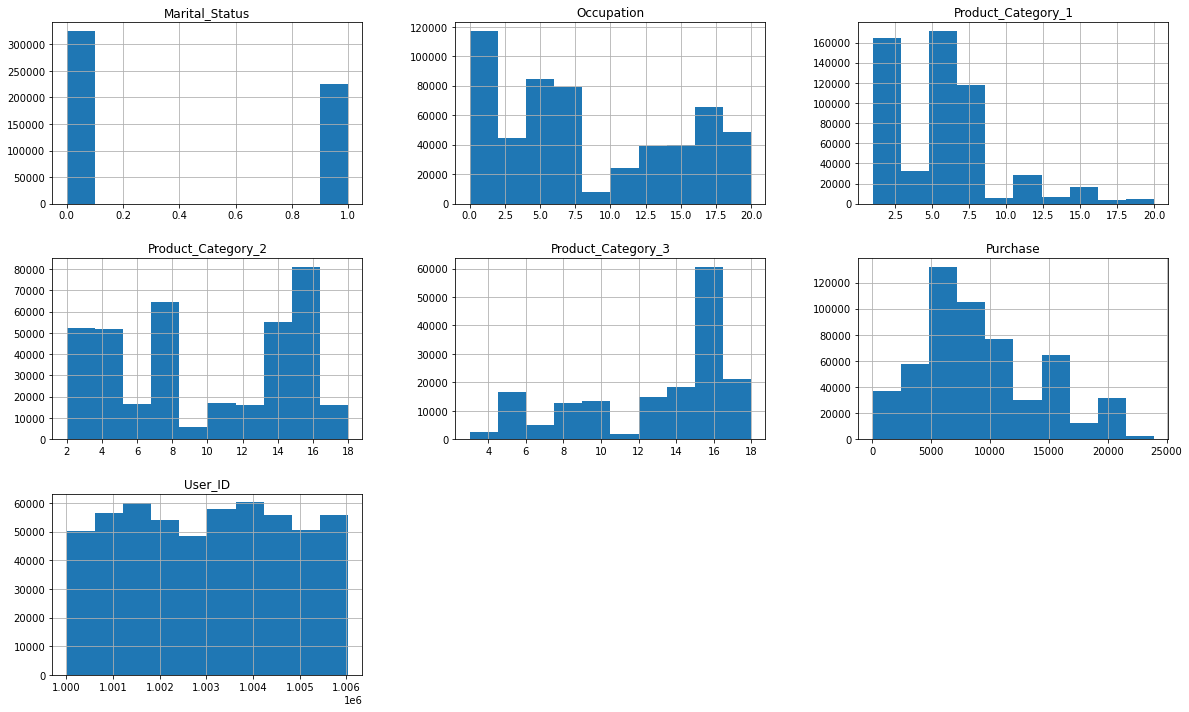

In [131]:
# Display frequency distribution plot
num_features.hist(figsize=(20,12))
plt.show()

In [132]:
# Checking for missing values
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [133]:
# Checking Percentage of missing values
percent_missing = data.isnull().sum() * 100 / len(data) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
missing_value_df

,percent_missing
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,31.566643


In [134]:
# Checking why Product_Category_2 is showing float data type
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [135]:
# Checking why Product_Category_3 is showing float data type
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [136]:
# Checking total amount of purchase
data['Purchase'].sum()

5095812742

# 3. Exploratory Data Analysis

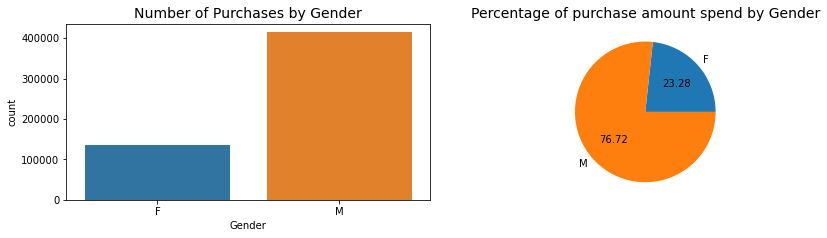

In [35]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.countplot(data['Gender'])
plt.title('Number of Purchases by Gender',fontsize=14)

plt.subplot(2,2,2) 
plt.pie(data.groupby('Gender')["Purchase"].sum(),labels=data['Gender'].unique(),autopct='%.2f')
plt.title("Percentage of purchase amount spend by Gender",fontsize=14)

plt.tight_layout()
plt.show()

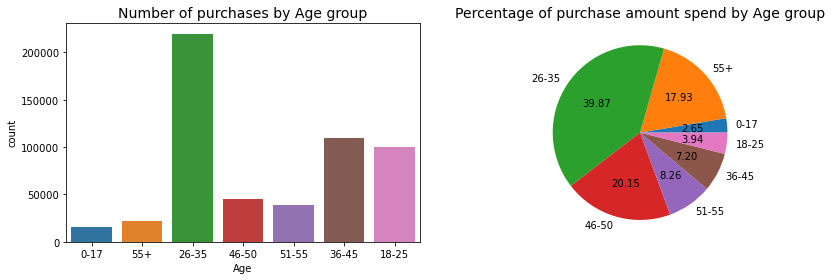

In [36]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data['Age'])
plt.title('Number of purchases by Age group',fontsize=14)

plt.subplot(1,2,2) 
plt.pie(data.groupby('Age')["Purchase"].sum(),labels=data['Age'].unique(),autopct='%.2f')
plt.title("Percentage of purchase amount spend by Age group",fontsize=14)

plt.tight_layout()
plt.show()

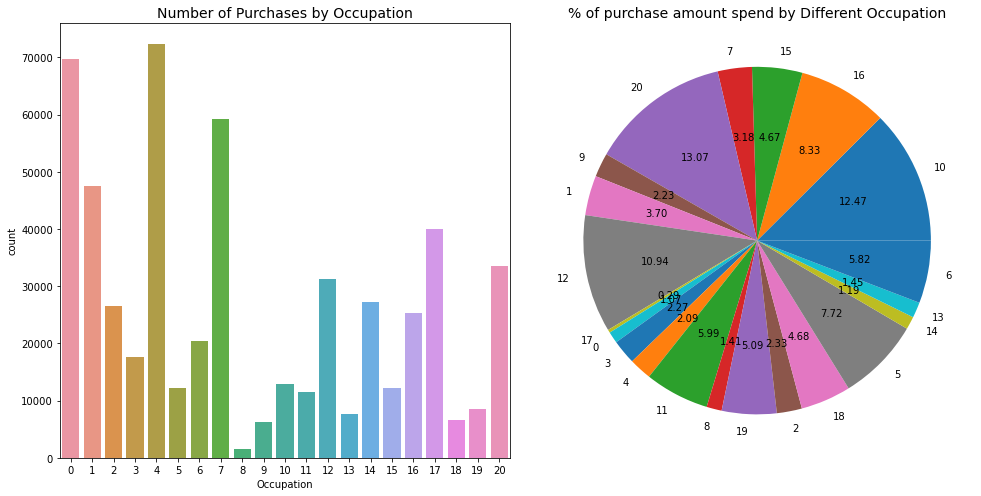

In [37]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
sns.countplot(data['Occupation'])
plt.title('Number of Purchases by Occupation',fontsize=14)

plt.subplot(1,2,2) 
plt.pie(data.groupby('Occupation')["Purchase"].sum(),labels=data['Occupation'].unique(),autopct='%.2f')
plt.title("% of purchase amount spend by Different Occupation",fontsize=14)

plt.tight_layout()
plt.show()

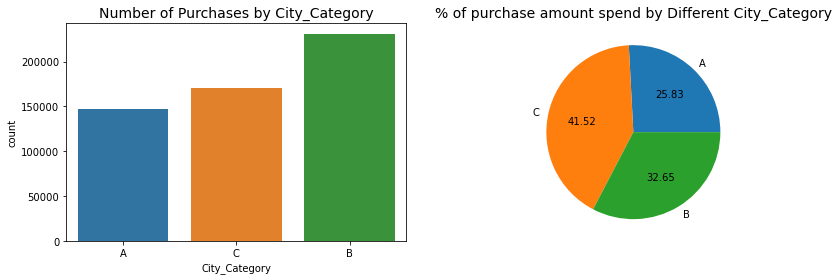

In [38]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data['City_Category'])
plt.title('Number of Purchases by City_Category',fontsize=14)

plt.subplot(1,2,2) 
plt.pie(data.groupby('City_Category')["Purchase"].sum(),labels=data['City_Category'].unique(),autopct='%.2f')
plt.title("% of purchase amount spend by Different City_Category",fontsize=14)

plt.tight_layout()
plt.show()

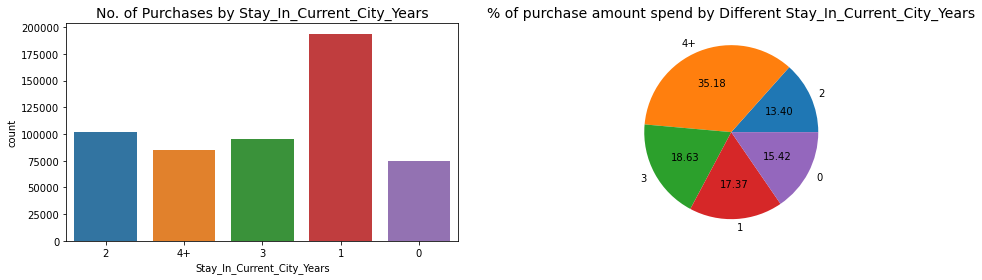

In [41]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.countplot(data['Stay_In_Current_City_Years'])
plt.title('No. of Purchases by Stay_In_Current_City_Years',fontsize=14)

plt.subplot(1,2,2) 
plt.pie(data.groupby('Stay_In_Current_City_Years')["Purchase"].sum(),labels=data['Stay_In_Current_City_Years'].unique(),autopct='%.2f')
plt.title("% of purchase amount spend by Different Stay_In_Current_City_Years",fontsize=14)

plt.tight_layout()
plt.show()

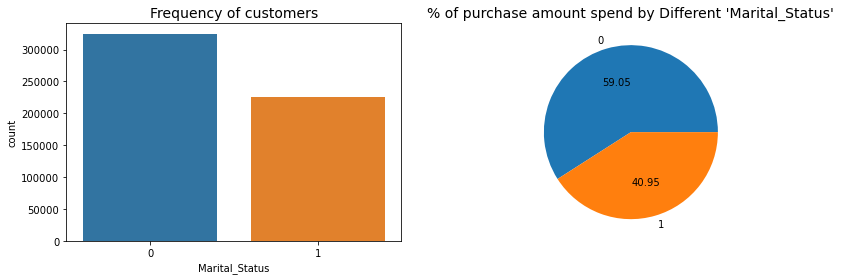

In [42]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data['Marital_Status'])
plt.title('Frequency of customers',fontsize=14)

plt.subplot(1,2,2) 
plt.pie(data.groupby('Marital_Status')["Purchase"].sum(),labels=data['Marital_Status'].unique(),autopct='%.2f')
plt.title("% of purchase amount spend by Different 'Marital_Status'",fontsize=14)

plt.tight_layout()
plt.show()

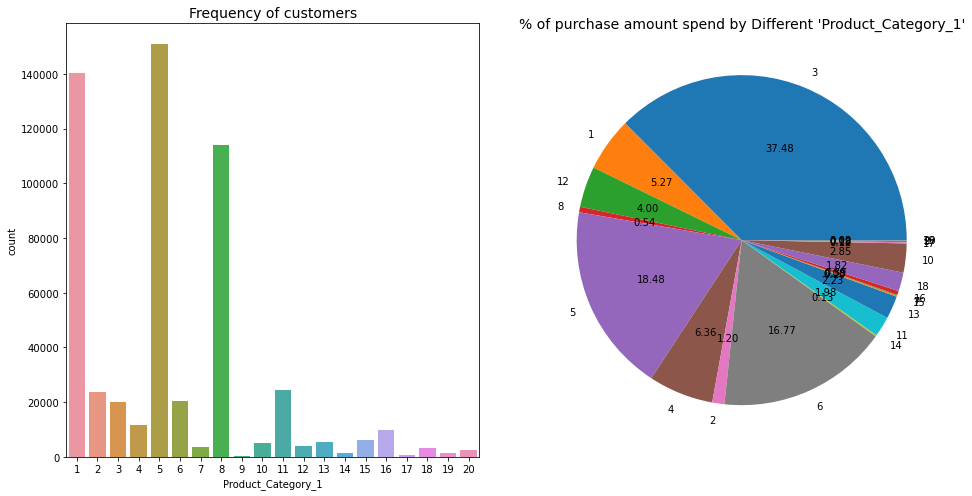

In [43]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
sns.countplot(data['Product_Category_1'])
plt.title('Frequency of customers',fontsize=14)

plt.subplot(1,2,2) 
plt.pie(data.groupby('Product_Category_1')["Purchase"].sum(),labels=data['Product_Category_1'].unique(),autopct='%.2f')
plt.title("% of purchase amount spend by Different 'Product_Category_1'",fontsize=14)

plt.tight_layout()
plt.show()

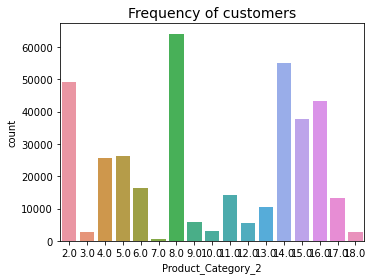

In [44]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data['Product_Category_2'])
plt.title('Frequency of customers',fontsize=14)

plt.show()

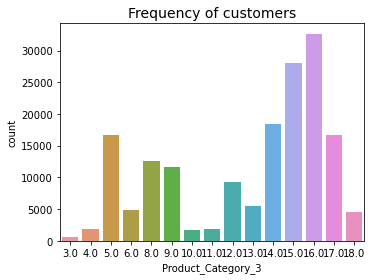

In [45]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(data['Product_Category_3'])
plt.title('Frequency of customers',fontsize=14)

plt.show()

# 4. Data Pre-Processing

## 4.1 Handling Missing Values

In [226]:
# Checking for missing values
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [227]:
# Checking for missing data percentage
percent_missing = data.isnull().sum() * 100 / len(data) 
missing_value_df = pd.DataFrame({'percent_missing': percent_missing}) 
missing_value_df

,percent_missing
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,31.566643


#### Here both Product_Category_2 & Product_Category_3 have missing values on more than 20% data. Even if we fill these columns with test static, more value will be artificial. In this case it is better to drop these columns. Also for every single product, It is not possible to have a second and third product category. 

In [228]:
# Removing Product_Category_2 and Product_Category_3 columns
data=data.drop(['Product_Category_2','Product_Category_3'],axis=1)

In [229]:
# Checking whether columns are removed or not
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# 4.2 Encoding Categorical Features

In [230]:
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Purchase                       int64
dtype: object

#### There are 4 columns with categorical values, object data type. If we use one hot encoding, no.of columns will be larger and model efficiency will decrease. Therefore, label encoding is used in this case so that no.of columns in the features is less

In [231]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_cols=['Gender', 'Age','City_Category','Stay_In_Current_City_Years']
for i in categorical_cols:
    data[i]=le.fit_transform(data[i])

In [232]:
# Checking data set after label encoding
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,8370
1,1000001,P00248942,0,0,10,0,2,0,1,15200
2,1000001,P00087842,0,0,10,0,2,0,12,1422
3,1000001,P00085442,0,0,10,0,2,0,12,1057
4,1000002,P00285442,1,6,16,2,4,0,8,7969


In [233]:
# Checking whether object data type changed or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int32 
 3   Age                         550068 non-null  int32 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  int32 
 6   Stay_In_Current_City_Years  550068 non-null  int32 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int32(4), int64(5), object(1)
memory usage: 33.6+ MB


In [234]:
# Checking Encoded Values
for i in categorical_cols:
    print(i,":",data[i].unique())

Gender : [0 1]
Age : [0 6 2 4 5 3 1]
City_Category : [0 2 1]
Stay_In_Current_City_Years : [2 4 3 1 0]


#### Now all the columns have numerical values.

## 4.3 Dimensionality Reduction

### 4.3.1 Removing ID columns

In [235]:
# Dispay unique value counts for each column
data.apply(lambda x:len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Purchase                      18105
dtype: int64

#### Here User_ID and Product_ID have more no.of unique values. These columns simply represent a particular user and product respectively. There are 5891 distinct customers and 3631 distinct products. These columns can be removed from further analysis.

In [236]:
# Removing User_ID and Product_ID columns
data=data.drop(['User_ID','Product_ID'],axis=1)

In [237]:
# Checking whether columns are removed or not
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0,0,10,0,2,0,3,8370
1,0,0,10,0,2,0,1,15200
2,0,0,10,0,2,0,12,1422
3,0,0,10,0,2,0,12,1057
4,1,6,16,2,4,0,8,7969


### 4.3.2 Checking Correlation

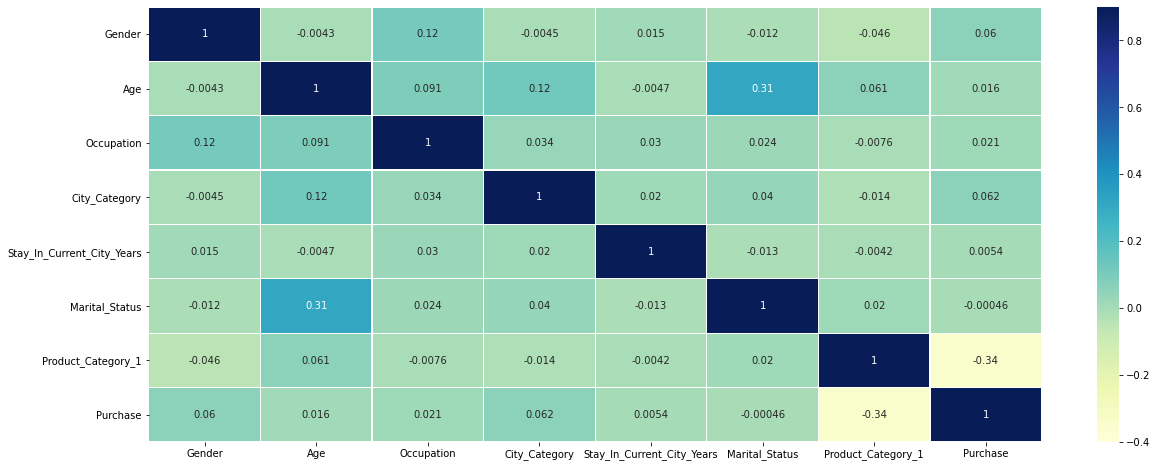

In [238]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

## 4.3 Handling Outliers

In [198]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [199]:
# Defining numerical and categorical features
numerical_features=data[['Occupation','Marital_Status','Product_Category_1','Purchase']]
categorical_features=data[['Gender','Age','City_Category','Stay_In_Current_City_Years']]

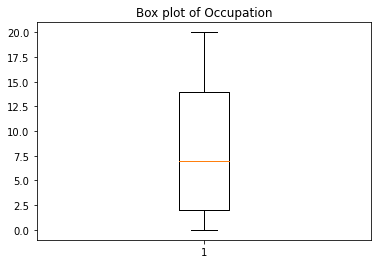

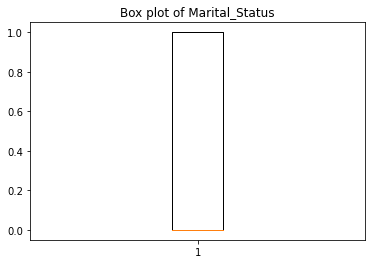

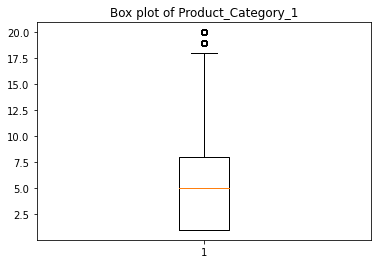

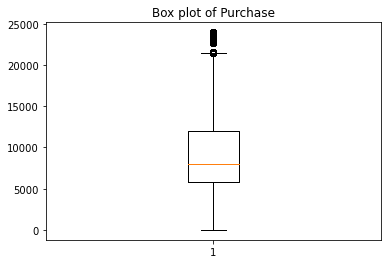

In [200]:
#Checking for outliers
for i in numerical_features.columns:
    plt.boxplot(num_features[i])
    plt.title('Box plot of '+i)
    plt.show()

#### There are outliers in Product_Category_1 and Purchase columns

### 4.4.1 Removing Outliers in Product_Category_1

In [201]:
# Defining upper limit and lower limit
Q1 = np.percentile(data['Product_Category_1'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Product_Category_1'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Product_Category_1'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR
print ('Lower limit is : ',low_lim)
print ('Upper limit is : ',upp_lim)

Lower limit is :  -9.5
Upper limit is :  18.5


#### Here outliers are above upper limit

In [202]:
# Removing outliers above upper limit
ind1=data['Product_Category_1']>upp_lim
data.drop(data.loc[ind1].index,inplace=True)

In [203]:
data.shape

(545915, 8)

Text(0.5, 1.0, 'Box plot of Product_Category_1')

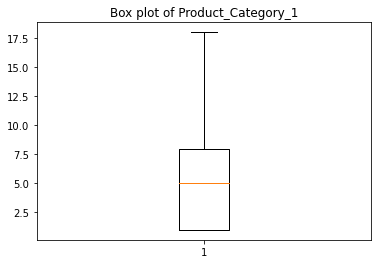

In [204]:
plt.boxplot(data['Product_Category_1'])
plt.title('Box plot of Product_Category_1')

#### Outliers in Product_Category_1 column is removed

### 4.4.2 Removing Outliers in Purchase

In [205]:
# Defining upper limit and lower limit
Q1 = np.percentile(data['Purchase'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Purchase'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Purchase'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR
print ('Lower limit is : ',low_lim)
print ('Upper limit is : ',upp_lim)

Lower limit is :  -3440.5
Upper limit is :  21379.5


#### Here all outliers are above upper limit

In [206]:
# Removing outliers above upper limit
ind1=data['Purchase']>upp_lim
data.drop(data.loc[ind1].index,inplace=True)

In [207]:
data.shape

(543210, 8)

Text(0.5, 1.0, 'Box plot of Purchase')

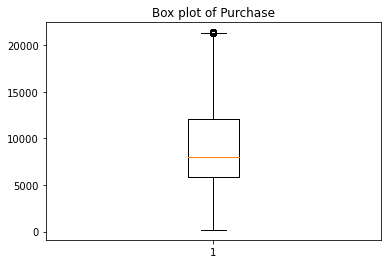

In [208]:
# Checking whether outliers removed or not
plt.boxplot(data['Purchase'])
plt.title('Box plot of Purchase')

### 4.4.3 Checking if there is any change in pattern after removing outliers

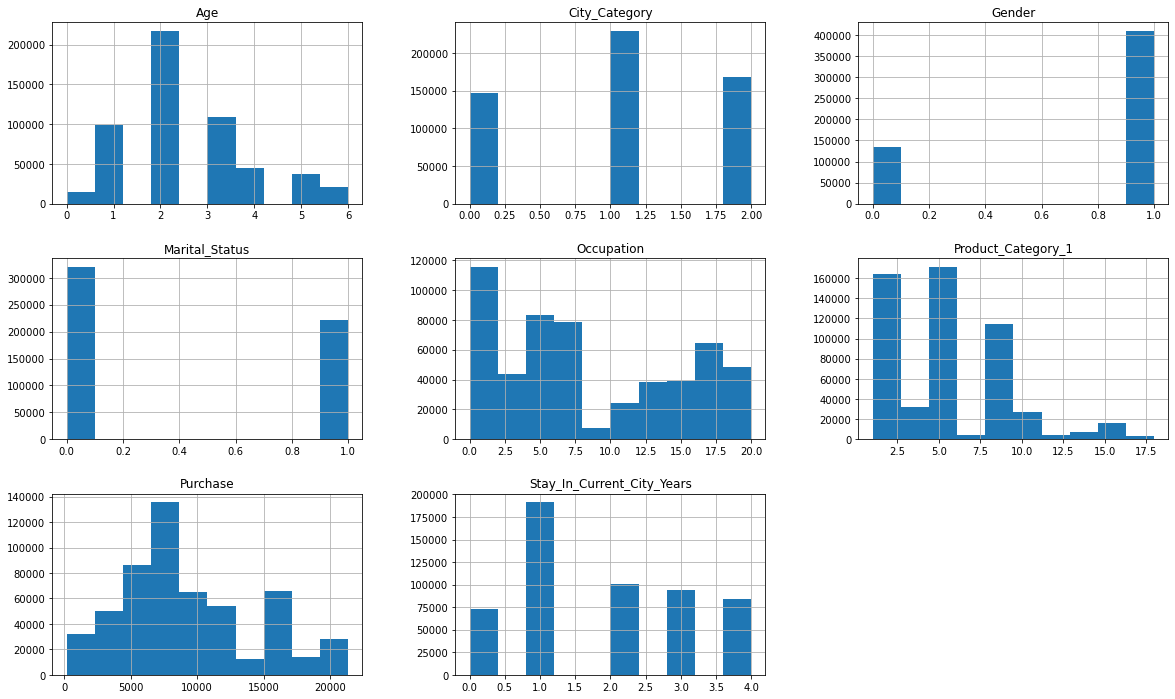

In [209]:
data.hist(figsize=(20,12))
plt.show()

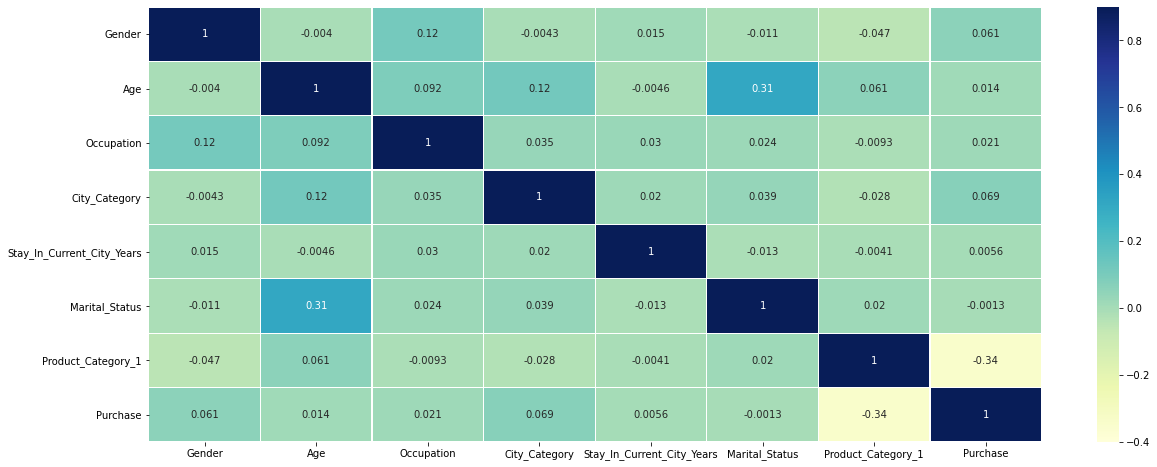

In [210]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

## 4.5 Checking Whether scaling is needed

#### Now all the columns have numerical values. Before going further lets check if scaling is needed. For that, descriptive statistics is checked to find the range of input features

In [212]:
data.describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
count,543210.000000,543210.000000,543210.000000,543210.000000,543210.000000,543210.000000,543210.000000,543210.000000
mean,0.753241,2.493636,8.073542,1.040034,1.858607,0.409435,5.269618,9263.453447
std,0.431126,1.351498,6.523237,0.759633,1.289582,0.491730,3.738354,4894.351613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,185.000000
25%,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,5858.000000
50%,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,5.000000,8052.000000
75%,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,8.000000,12036.000000
max,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,18.000000,21378.000000


#### Here all the values in the input features list is up to max value 20. Therefore, we can proceed without scaling

# 5. Modelling

## 5.1 Splitting data to features and target

#### Here target is Purchase amount and all others are input features for the model

In [213]:
X=data.drop(['Purchase'],axis=1)
y=data['Purchase']

In [214]:
y.shape

(543210,)

In [215]:
X.shape

(543210, 7)

## 5.2 Splitting data to test and train set

In [216]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [217]:
print('X_train shape is : ',X_train.shape)
print('X_test shape is : ',X_test.shape)
print('y_train shape is : ',y_train.shape)
print('y_test shape is : ',y_test.shape)

X_train shape is :  (434568, 7)
X_test shape is :  (108642, 7)
y_train shape is :  (434568,)
y_test shape is :  (108642,)


## 5.3 Buiding Model and Evaluating Model

#### Here the problem is multivariate regression problem. The parameters used for evaluating model are Mean Squared Error(MSE) and R square score. The lesser MSE, the model is better. Also the R square score closer to 1 indicates better model. The models used are Linear Regression, Decision Tree Regressor, Random Forest Regressor and XGB Regressor 

In [218]:
from sklearn.metrics import mean_squared_error,r2_score

### 5.3.1 Linear Regression Model

In [219]:
# Building and evaluating linear regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)
rms=mean_squared_error(y_test,y_pred,squared=False)
r_sq = r2_score(y_test,y_pred)
print('RMSE is:',rms)
print(r_sq)

RMSE is: 4579.439490919013
0.1240603689278299


### 5.3.2 Decision Tree Regression Model

In [220]:
# Building and evaluating Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)
y_pred=model.predict(X_test)
rms=mean_squared_error(y_test,y_pred,squared=False)
r_sq = r2_score(y_test,y_pred)
print('RMSE is:',rms)
print(r_sq)

RMSE is: 2954.8568374510282
0.6353112095365925


### 5.3.3 Random Forest Regression Model

In [221]:
## Building and evaluating Random Forest model
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
model=rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
rms=mean_squared_error(y_test,y_pred,squared=False)
r_sq = r2_score(y_test,y_pred)
print('RMSE is:',rms)
print(r_sq)

RMSE is: 2925.9796101685124
0.6424044407832133


### 5.3.4 XGB Regression Model

In [222]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
model=xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
rms=mean_squared_error(y_test,y_pred,squared=False)
r_sq = r2_score(y_test,y_pred)
print('RMSE is:',rms)
print(r_sq)

RMSE is: 2941.1811214474237
0.6386791148293506
